<a href="https://colab.research.google.com/github/Awaish0419/AsianOption/blob/main/AsianOption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation function of Asian option

## Monte Carlo

In [8]:
def calculate_asian_value_monte_carlo(S0, T, r, sigma, K, num_time_steps, num_paths, isCall, averaging="arithmetic"):
  import numpy as np

  dt = T / num_time_steps
  discount_factor = np.exp(-r * T)

  S = np.zeros((num_paths, num_time_steps + 1))
  S[:, 0] = S0

  for t in range(1, num_time_steps + 1):
    Z = np.random.standard_normal(num_paths)
    S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

  if averaging == "arithmetic":
    S_avg = np.mean(S[:, 1:], axis=1)
  elif averaging == "geometric":
    S_avg = np.exp(np.mean(np.log(S[:, 1:]), axis=1))

  if isCall:
    payoffs = np.maximum(S_avg - K, 0)
  elif (not isCall):
    payoffs = np.maximum(K - S_avg, 0)

  option_price = discount_factor * np.mean(payoffs)

  return option_price

## Finite Difference PDE (one dimension)

## Moment Matching

In [39]:
def calculate_asian_value_moment_matching(S0, T, r, sigma, K, isCall):
  import numpy as np
  from scipy.stats import norm

  mu_adj = r - 0.5 * sigma**2
  E_A = S0 * (np.exp(mu_adj * T) - 1) / (mu_adj * T) if mu_adj != 0 else S0

  Var_A = (S0**2 * np.exp(2 * mu_adj * T) / (mu_adj**2 * T**2) *
   ((np.exp(sigma**2 * T) - 1) / (sigma**2 * T) - 1))

  Var_A = max(Var_A, 0)

  sigma_A2 = np.log(1 + Var_A / E_A**2)
  sigma_A = np.sqrt(sigma_A2)
  mu_A = np.log(E_A) - 0.5 * sigma_A2

  d1 = (np.log(E_A / K) + 0.5 * sigma_A2) / sigma_A
  d2 = d1 - sigma_A

  if isCall:
    price = np.exp(-r * T) * (E_A * norm.cdf(d1) - K * norm.cdf(d2))
  else:
    price = np.exp(-r * T) * (K * norm.cdf(-d2) - E_A * norm.cdf(-d1))

  return price

## Visualize the results

In [11]:
import matplotlib.pyplot as plt
import numpy as np

### Monte Carlo

#### Call option with arithmetic averaging

In [61]:
# maturity time
T = 1
# risk free interest
r = 0.02
# volatility
sigma = 0.2
# exercise price
K = 100
# divide T into num_time_steps steps
num_time_steps = 100
# number of manipulation
num_paths = 10000
# Call or Put option
isCall = True
# averaging (arithmetic or geometric)
averaging = "arithmetic"

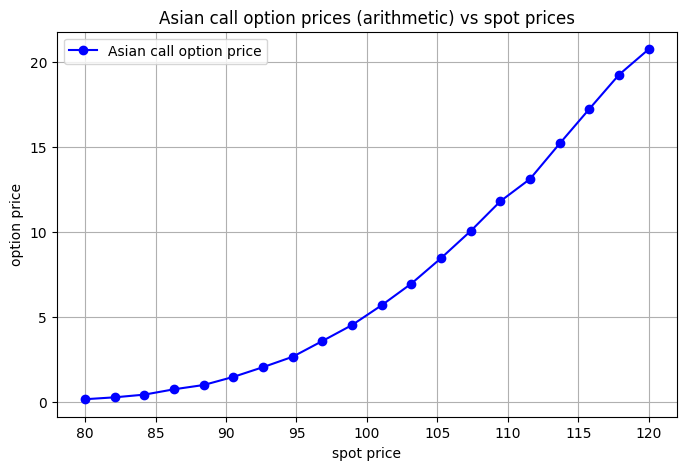

In [62]:
S0_values = np.linspace(80, 120, 20)
arithmetic_asian_call_option_prices_monte_carlo = [calculate_asian_value_monte_carlo(S0, T, r, sigma, K, num_time_steps, num_paths, isCall, averaging) for S0 in S0_values]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(S0_values, arithmetic_asian_call_option_prices_monte_carlo, marker='o', linestyle='-', color='b', label="Asian call option price")
plt.xlabel("spot price")
plt.ylabel("option price")
plt.title("Asian call option prices (arithmetic) vs spot prices")
plt.legend()
plt.grid(True)
plt.show()

#### Call option with geometric averaging

In [63]:
# maturity time
T = 1
# risk free interest
r = 0.02
# volatility
sigma = 0.2
# exercise price
K = 100
# divide T into num_time_steps steps
num_time_steps = 100
# number of manipulation
num_paths = 10000
# Call or Put option
isCall = True
# averaging (arithmetic or geometric)
averaging = "geometric"

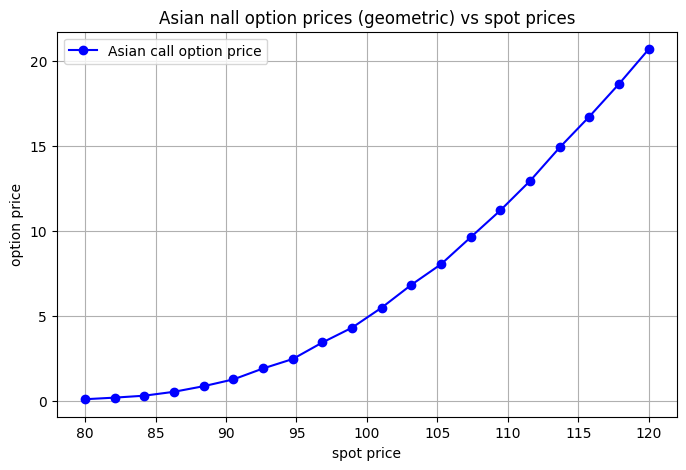

In [64]:
S0_values = np.linspace(80, 120, 20)
geometric_asian_call_option_prices_monte_carlo = [calculate_asian_value_monte_carlo(S0, T, r, sigma, K, num_time_steps, num_paths, isCall, averaging) for S0 in S0_values]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(S0_values, geometric_asian_call_option_prices_monte_carlo, marker='o', linestyle='-', color='b', label="Asian call option price")
plt.xlabel("spot price")
plt.ylabel("option price")
plt.title("Asian nall option prices (geometric) vs spot prices")
plt.legend()
plt.grid(True)
plt.show()

#### Put option with arithmetic averaging

In [65]:
# maturity time
T = 1
# risk free interest
r = 0.02
# volatility
sigma = 0.2
# exercise price
K = 100
# divide T into num_time_steps steps
num_time_steps = 100
# number of manipulation
num_paths = 10000
# Call or Put option
isCall = False
# averaging (arithmetic or geometric)
averaging = "arithmetic"

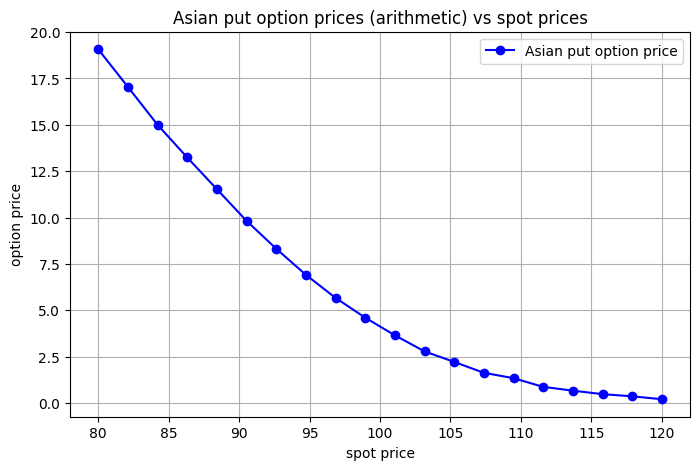

In [66]:
S0_values = np.linspace(80, 120, 20)
arithmetic_asian_put_option_prices_monte_carlo = [calculate_asian_value_monte_carlo(S0, T, r, sigma, K, num_time_steps, num_paths, isCall, averaging) for S0 in S0_values]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(S0_values, arithmetic_asian_put_option_prices_monte_carlo, marker='o', linestyle='-', color='b', label="Asian put option price")
plt.xlabel("spot price")
plt.ylabel("option price")
plt.title("Asian put option prices (arithmetic) vs spot prices")
plt.legend()
plt.grid(True)
plt.show()

#### Put option with geometric averaging

In [67]:
# maturity time
T = 1
# risk free interest
r = 0.02
# volatility
sigma = 0.2
# exercise price
K = 100
# divide T into num_time_steps steps
num_time_steps = 100
# number of manipulation
num_paths = 10000
# Call or Put option
isCall = False
# averaging (arithmetic or geometric)
averaging = "geometric"

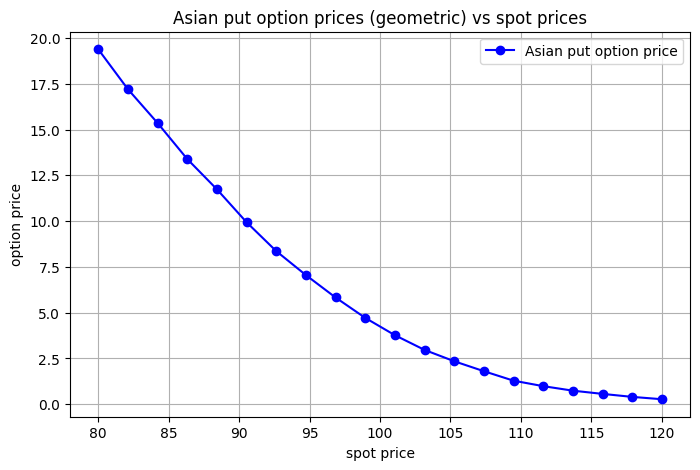

In [68]:
S0_values = np.linspace(80, 120, 20)
geometric_asian_put_option_prices_monte_carlo = [calculate_asian_value_monte_carlo(S0, T, r, sigma, K, num_time_steps, num_paths, isCall, averaging) for S0 in S0_values]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(S0_values, geometric_asian_put_option_prices_monte_carlo, marker='o', linestyle='-', color='b', label="Asian put option price")
plt.xlabel("spot price")
plt.ylabel("option price")
plt.title("Asian put option prices (geometric) vs spot prices")
plt.legend()
plt.grid(True)
plt.show()

### Finite Difference PDE (1 dimension)

### Moment Matching

#### Call option with arithmetic averaging

In [69]:
# maturity time
T = 1
# risk free interest
r = 0.02
# volatility
sigma = 0.2
# exercise price
K = 100
# Call or Put option
isCall = True
# averaging (arithmetic or geometric)
averaging = "arithmetic"

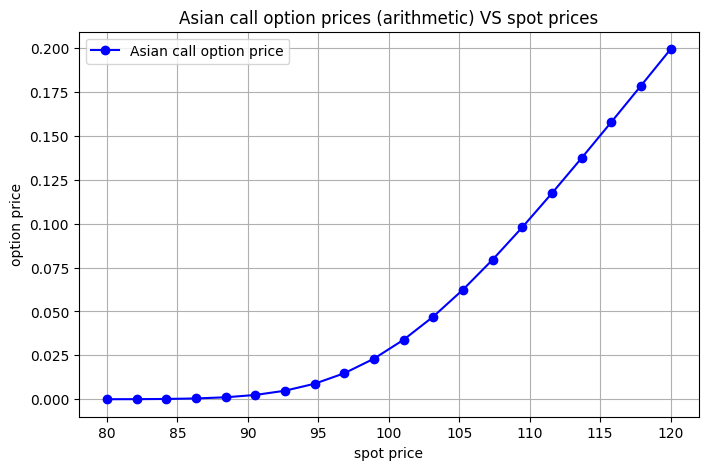

In [70]:
S0_values = np.linspace(80, 120, 20)
arithmetic_asian_call_option_prices_moment_matching = [calculate_asian_value_moment_matching(S0, T, r, sigma, K, isCall) for S0 in S0_values]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(S0_values, arithmetic_asian_call_option_prices_moment_matching, marker='o', linestyle='-', color='b', label="Asian call option price")
plt.xlabel("spot price")
plt.ylabel("option price")
plt.title("Asian call option prices (arithmetic) VS spot prices")
plt.legend()
plt.grid(True)
plt.show()

#### Put option with arithmetic averaging

In [71]:
# maturity time
T = 1
# risk free interest
r = 0.02
# volatility
sigma = 0.2
# exercise price
K = 100
# Call or Put option
isCall = False
# averaging (arithmetic or geometric)
averaging = "arithmetic"

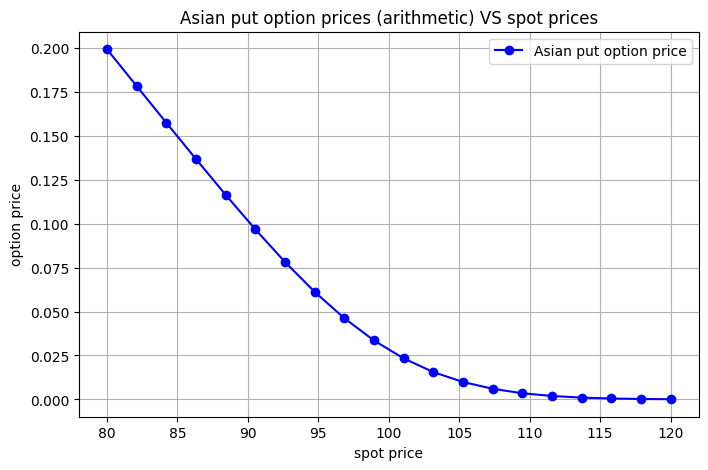

In [72]:
S0_values = np.linspace(80, 120, 20)
arithmetic_asian_put_option_prices_moment_matching = [calculate_asian_value_moment_matching(S0, T, r, sigma, K, isCall) for S0 in S0_values]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(S0_values, arithmetic_asian_put_option_prices_moment_matching, marker='o', linestyle='-', color='b', label="Asian put option price")
plt.xlabel("spot price")
plt.ylabel("option price")
plt.title("Asian put option prices (arithmetic) VS spot prices")
plt.legend()
plt.grid(True)
plt.show()

### Comparison

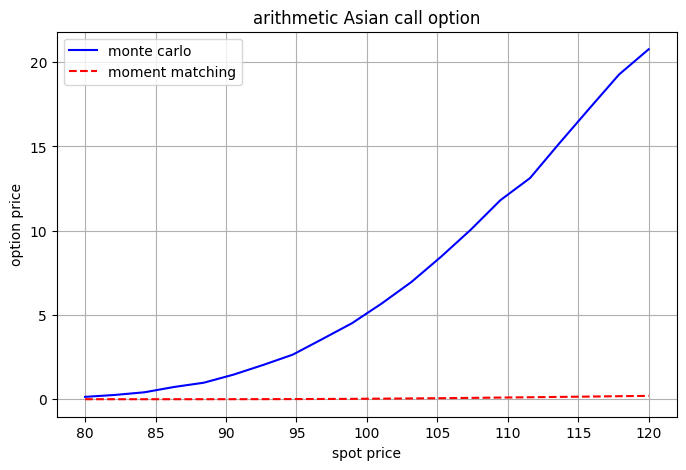

In [73]:
plt.figure(figsize=(8, 5))
plt.plot(S0_values, arithmetic_asian_call_option_prices_monte_carlo, label='monte carlo', linestyle='-', color='b')
plt.plot(S0_values, arithmetic_asian_call_option_prices_moment_matching, label='moment matching', linestyle='--', color='r')

plt.xlabel('spot price')
plt.ylabel('option price')
plt.title('arithmetic Asian call option')
plt.legend()
plt.grid()

plt.show()

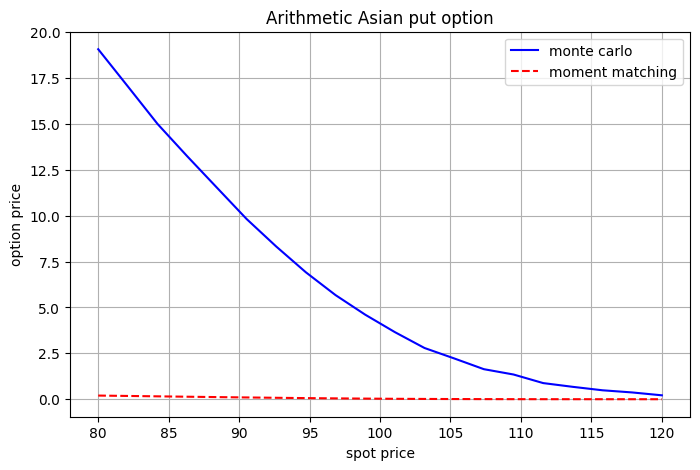

In [74]:
plt.figure(figsize=(8, 5))
plt.plot(S0_values, arithmetic_asian_put_option_prices_monte_carlo, label='monte carlo', linestyle='-', color='b')
plt.plot(S0_values, arithmetic_asian_put_option_prices_moment_matching, label='moment matching', linestyle='--', color='r')

plt.xlabel('spot price')
plt.ylabel('option price')
plt.title('Arithmetic Asian put option')
plt.legend()
plt.grid()

plt.show()